## Actividad 4.2
María Matanzo Hermoso | A01737554

Laisha Puentes Angulo | A012736397

Marco Cornejo Cornejo | A01276411

Jorge Alberto Cortes Sánchez | A01736236

Eduardo Torres Naredo | A01734935

In [2176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [2177]:
info_forvia_processed = pd.read_csv("projectos_forvia.csv")

In [2178]:
info_forvia_processed.isnull().sum()

Number                    1
Active                    1
Project Name              1
Project Type              1
Geographical scope        1
Project manager           1
State                     1
Percent complete          1
Project size              1
Project organization      1
Planned Go Live date      1
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    1
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2179]:
info_forvia_processed[["Number", "Active", "Project Name"]] = info_forvia_processed[["Number", "Active", "Project Name"]].fillna(method="bfill")
info_forvia_processed[["Number", "Active", "Project Name"]] = info_forvia_processed[["Number", "Active", "Project Name"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3824434750.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Number", "Active", "Project Name"]] = info_forvia_processed[["Number", "Active", "Project Name"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3824434750.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Number", "Active", "Project Name"]] = info_forvia_processed[["Number", "Active", "Project Name"]].fillna(method="ffill")


Number                    0
Active                    0
Project Name              0
Project Type              1
Geographical scope        1
Project manager           1
State                     1
Percent complete          1
Project size              1
Project organization      1
Planned Go Live date      1
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    1
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2180]:
info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]] = info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]].fillna(method="bfill")
info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]] = info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2316418380.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]] = info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2316418380.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]] = info_forvia_processed[["Project Type", "Geographical scope", "Project manager", "State"]].fillna(method="ffill")


Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          1
Project size              1
Project organization      1
Planned Go Live date      1
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    1
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2181]:
info_forvia_processed[["Percent complete"]] = info_forvia_processed[["Percent complete"]].fillna(method="bfill")
info_forvia_processed[["Percent complete"]] = info_forvia_processed[["Percent complete"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2391127550.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Percent complete"]] = info_forvia_processed[["Percent complete"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2391127550.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Percent complete"]] = info_forvia_processed[["Percent complete"]].fillna(method="ffill")


Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              1
Project organization      1
Planned Go Live date      1
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    1
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2182]:
info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]] = info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]].fillna(method="bfill")
info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]] = info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3260094442.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]] = info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3260094442.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]] = info_forvia_processed[["Project size", "Project organization", "Planned Go Live date"]].fillna(method="ffill")


Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    1
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2183]:
info_forvia_processed[["Domain"]] = info_forvia_processed[["Domain"]].fillna("Global")
info_forvia_processed.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        1
Closed                  245
Domain                    0
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2184]:
info_forvia_processed[["BG"]] = info_forvia_processed[["BG"]].fillna(method="bfill")
info_forvia_processed[["BG"]] = info_forvia_processed[["BG"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2523583482.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["BG"]] = info_forvia_processed[["BG"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2523583482.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["BG"]] = info_forvia_processed[["BG"]].fillna(method="ffill")


Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        0
Closed                  245
Domain                    0
Domain Path               1
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2185]:
info_forvia_processed[["Domain Path"]] = info_forvia_processed[["Domain Path"]].fillna("/")
info_forvia_processed.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        0
Closed                  245
Domain                    0
Domain Path               0
Last WAR                 14
Project Health           14
Project type              1
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2186]:
info_forvia_processed[["Project type"]] = info_forvia_processed[["Project type"]].fillna("REGULAR")
info_forvia_processed.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        0
Closed                  245
Domain                    0
Domain Path               0
Last WAR                 14
Project Health           14
Project type              0
Recurrent activity        1
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2187]:
info_forvia_processed[["Recurrent activity"]] = info_forvia_processed[["Recurrent activity"]].fillna("FALSO")
info_forvia_processed.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        0
Closed                  245
Domain                    0
Domain Path               0
Last WAR                 14
Project Health           14
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        19
On-hold                   1
dtype: int64

In [2188]:
info_forvia_processed[["On-hold"]] = info_forvia_processed[["On-hold"]].fillna(method="ffill")
info_forvia_processed[["On-hold"]] = info_forvia_processed[["On-hold"]].fillna(method="bfill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2181909076.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["On-hold"]] = info_forvia_processed[["On-hold"]].fillna(method="ffill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2181909076.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["On-hold"]] = info_forvia_processed[["On-hold"]].fillna(method="bfill")


Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    174
Actual Go Live date     198
Actual end date         246
BG                        0
Closed                  245
Domain                    0
Domain Path               0
Last WAR                 14
Project Health           14
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        19
On-hold                   0
dtype: int64

In [2189]:
info_forvia_processed=info_forvia_processed.drop(['Actual end date', 'Closed', 'Project target phase', 'Actual Go Live date'],axis=1)
info_forvia_processed.isnull().sum()

Number                   0
Active                   0
Project Name             0
Project Type             0
Geographical scope       0
Project manager          0
State                    0
Percent complete         0
Project size             0
Project organization     0
Planned Go Live date     0
BG                       0
Domain                   0
Domain Path              0
Last WAR                14
Project Health          14
Project type             0
Recurrent activity       0
Planned start date       0
Actual start date       19
On-hold                  0
dtype: int64

In [2190]:
info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]] = info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]].fillna(method="bfill")
info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]] = info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]].fillna(method="ffill")
info_forvia_processed.isnull().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2734994906.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]] = info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]].fillna(method="bfill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2734994906.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]] = info_forvia_processed[["Last WAR", "Project Health", "Actual start date"]].fillna(method="ffill")


Number                  0
Active                  0
Project Name            0
Project Type            0
Geographical scope      0
Project manager         0
State                   0
Percent complete        0
Project size            0
Project organization    0
Planned Go Live date    0
BG                      0
Domain                  0
Domain Path             0
Last WAR                0
Project Health          0
Project type            0
Recurrent activity      0
Planned start date      0
Actual start date       0
On-hold                 0
dtype: int64

In [2191]:
info_forvia_processed

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,BG,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,FIS,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,18/01/2024 08:00:00,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,FCM,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,FCM,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,FCM,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,FCM,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,PRJ0074287,VERDADERO,wuhu New site create for T18 FAS Project,New Site infrastructure,WUHU FAS Interim,CHEN Ken,Work in progress,99.54,LARGE,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infr...,...,FAS,global,/,PRJSTAT0075167,Green,Regular,FALSO,23/04/2024 08:00:00,24/04/2024 04:24:48,FALSO
242,PRJ0075363,VERDADERO,Xian BYD FAS DMC project deployment,Shopfloor DMC/SPC,XI AN FAS BYD,WANG Mark,Work in progress,0.00,MEDIUM,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,...,FAS,global,/,PRJSTAT0075363,Green,Regular,FALSO,10/4/2025 8:00,21/04/2025 09:09:50,FALSO
243,PRJ0075167,VERDADERO,Zhengzhou BYD FAS DMC project deployment,Shopfloor DMC/SPC,ZHENGZHOU FAS BYD,WANG Mark,Work in progress,85.98,MEDIUM,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,...,FAS,global,/,PRJSTAT0075364,Green,Regular,FALSO,12/2/2025 8:00,12/2/2025 8:00,FALSO
244,PRJ0075163,VERDADERO,Zhengzhou FAS Chery T1N IJCore TCO Project,Shopfloor JIT/TCO,ZHENGZHOU FAS BYD,ZHANG Jack,Work in progress,0.00,SMALL,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,...,FAS,global,/,PRJSTAT0075320,Green,Regular,FALSO,11/2/2025 8:00,12/2/2025 8:00,FALSO


In [2192]:
lista = ['Project Type','Geographical scope','Project manager','State','Project size','Project organization','BG','Planned start date', 'Actual start date', 'Project Health', 'On-hold']

In [2193]:
n=0
datos_numericos = info_forvia_processed.copy()
for col in lista:
    Tabla_freq = info_forvia_processed[col].value_counts()
    mapeo = {cat: i+1 for i, cat in enumerate(Tabla_freq.index.unique())}
    info_forvia_processed[col] = info_forvia_processed[col].map(mapeo)

Tabla_final_num =info_forvia_processed[lista]
Tabla_final_num["Percent complete"] = info_forvia_processed["Percent complete"]
Tabla_final_num.head(15)

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3166740037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_num["Percent complete"] = info_forvia_processed["Percent complete"]


,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Planned start date,Actual start date,Project Health,On-hold,Percent complete
0,1,62,2,1,3,1,1,51,18,1,1,26.47
1,1,61,20,1,2,1,2,61,18,2,2,52.17
2,1,50,19,1,1,1,2,57,26,2,1,95.85
3,1,50,20,1,3,1,2,65,29,1,2,20.90
4,1,57,2,1,1,1,2,7,30,1,1,24.30
5,4,60,50,1,2,3,2,62,33,1,1,13.18
6,2,59,1,1,1,4,4,63,34,2,2,99.25
7,4,49,40,1,2,1,1,64,31,1,1,91.45
8,2,49,55,1,2,2,1,58,32,1,1,93.30
9,3,58,56,1,2,23,4,59,97,1,1,9.98


In [2194]:
lista1 = ['Actual start date', 'Planned start date', 'Geographical scope', 'Project manager']

In [2195]:
n=0
datos_numericos = info_forvia_processed.copy()
for col in lista1:
    Tabla_freq = info_forvia_processed[col].value_counts()
    mapeo = {cat: i+1 for i, cat in enumerate(Tabla_freq.index.unique())}
    info_forvia_processed[col] = info_forvia_processed[col].map(mapeo)

Tabla_final =info_forvia_processed[lista1]
Tabla_final["Percent complete"] = info_forvia_processed["Percent complete"]
Tabla_final.head(15)

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\1023949488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Percent complete"] = info_forvia_processed["Percent complete"]


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,18,51,62,2,26.47
1,18,61,61,20,52.17
2,26,57,50,19,95.85
3,29,65,50,20,20.90
4,30,7,57,2,24.30
5,33,62,60,50,13.18
6,34,63,59,1,99.25
7,31,64,49,40,91.45
8,32,58,49,55,93.30
9,97,59,58,56,9.98


In [2196]:
P25 = np.percentile(Tabla_final['Percent complete'], 25)
P50 = np.percentile(Tabla_final['Percent complete'], 50)
P75 = np.percentile(Tabla_final['Percent complete'], 75)
P90 = np.percentile(Tabla_final['Percent complete'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 6.965  P50: 28.4  P75: 73.17999999999999  P90: 96.05000000000001


In [2197]:
Tabla_final["Percent complete"]=Tabla_final["Percent complete"].apply(lambda x:1 if x>=28.4 else 0)
Tabla_final

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3683062708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Percent complete"]=Tabla_final["Percent complete"].apply(lambda x:1 if x>=28.4 else 0)


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,18,51,62,2,0
1,18,61,61,20,1
2,26,57,50,19,1
3,29,65,50,20,0
4,30,7,57,2,0
...,...,...,...,...,...
241,225,190,40,120,1
242,226,191,126,26,0
243,2,192,20,26,1
244,2,9,20,46,0


In [2198]:
P25 = np.percentile(Tabla_final['Planned start date'], 25)
P50 = np.percentile(Tabla_final['Planned start date'], 50)
P75 = np.percentile(Tabla_final['Planned start date'], 75)
P90 = np.percentile(Tabla_final['Planned start date'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 23.0  P50: 70.5  P75: 131.75  P90: 168.5


In [2199]:
Tabla_final["Planned start date"]=Tabla_final["Planned start date"].apply(lambda x:1 if x>=70.5 else 0)
Tabla_final

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\2382342191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Planned start date"]=Tabla_final["Planned start date"].apply(lambda x:1 if x>=70.5 else 0)


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,18,0,62,2,0
1,18,0,61,20,1
2,26,0,50,19,1
3,29,0,50,20,0
4,30,0,57,2,0
...,...,...,...,...,...
241,225,1,40,120,1
242,226,1,126,26,0
243,2,1,20,26,1
244,2,0,20,46,0


In [2200]:
P25 = np.percentile(Tabla_final['Actual start date'], 25)
P50 = np.percentile(Tabla_final['Actual start date'], 50)
P75 = np.percentile(Tabla_final['Actual start date'], 75)
P90 = np.percentile(Tabla_final['Actual start date'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 42.25  P50: 103.5  P75: 164.75  P90: 201.5


In [2201]:
Tabla_final["Actual start date"]=Tabla_final["Actual start date"].apply(lambda x:1 if x>=103.5 else 0)
Tabla_final

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\1970362713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Actual start date"]=Tabla_final["Actual start date"].apply(lambda x:1 if x>=103.5 else 0)


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,0,0,62,2,0
1,0,0,61,20,1
2,0,0,50,19,1
3,0,0,50,20,0
4,0,0,57,2,0
...,...,...,...,...,...
241,1,1,40,120,1
242,1,1,126,26,0
243,0,1,20,26,1
244,0,0,20,46,0


In [2202]:
P25 = np.percentile(Tabla_final['Geographical scope'], 25)
P50 = np.percentile(Tabla_final['Geographical scope'], 50)
P75 = np.percentile(Tabla_final['Geographical scope'], 75)
P90 = np.percentile(Tabla_final['Geographical scope'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 9.0  P50: 28.0  P75: 64.75  P90: 101.5


In [2203]:
Tabla_final["Geographical scope"]=Tabla_final["Geographical scope"].apply(lambda x:1 if x>=28 else 0)
Tabla_final

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\3818789699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Geographical scope"]=Tabla_final["Geographical scope"].apply(lambda x:1 if x>=28 else 0)


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,0,0,1,2,0
1,0,0,1,20,1
2,0,0,1,19,1
3,0,0,1,20,0
4,0,0,1,2,0
...,...,...,...,...,...
241,1,1,1,120,1
242,1,1,1,26,0
243,0,1,0,26,1
244,0,0,0,46,0


In [2204]:
P25 = np.percentile(Tabla_final['Project manager'], 25)
P50 = np.percentile(Tabla_final['Project manager'], 50)
P75 = np.percentile(Tabla_final['Project manager'], 75)
P90 = np.percentile(Tabla_final['Project manager'], 90)

print("P25:", P25, " P50:", P50, " P75:", P75, " P90:", P90)

P25: 7.0  P50: 24.5  P75: 58.75  P90: 95.5


In [2205]:
Tabla_final["Project manager"]=Tabla_final["Project manager"].apply(lambda x:1 if x>24.5 else 0)
Tabla_final

C:\Users\maryk\AppData\Local\Temp\ipykernel_28484\1181594906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final["Project manager"]=Tabla_final["Project manager"].apply(lambda x:1 if x>24.5 else 0)


,Actual start date,Planned start date,Geographical scope,Project manager,Percent complete
0,0,0,1,0,0
1,0,0,1,0,1
2,0,0,1,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
241,1,1,1,1,1
242,1,1,1,1,0
243,0,1,0,1,1
244,0,0,0,1,0


In [2206]:
Tabla_final_num

,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Planned start date,Actual start date,Project Health,On-hold,Percent complete
0,1,62,2,1,3,1,1,51,18,1,1,26.47
1,1,61,20,1,2,1,2,61,18,2,2,52.17
2,1,50,19,1,1,1,2,57,26,2,1,95.85
3,1,50,20,1,3,1,2,65,29,1,2,20.90
4,1,57,2,1,1,1,2,7,30,1,1,24.30
...,...,...,...,...,...,...,...,...,...,...,...,...
241,6,40,120,1,2,10,3,190,225,1,1,99.54
242,8,126,26,1,1,3,3,191,226,1,1,0.00
243,8,20,26,1,1,3,3,192,2,1,1,85.98
244,1,20,46,1,3,3,3,9,2,1,1,0.00


## Regresion lineal 1

In [2272]:
Vars_Indep= Tabla_final_num[['Percent complete', 'Actual start date']]
Var_Dep= Tabla_final['Planned start date']
X= Vars_Indep
y= Var_Dep

In [2273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2274]:
y_pred = algoritmo.predict(X_test) 
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0])

In [2275]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[23 17]
 [15 19]]


In [2276]:
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.5277777777777778


In [2277]:
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.6052631578947368


In [2278]:
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5675675675675675


In [2279]:
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.5588235294117647


In [2280]:
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.575


In [2281]:
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.5428571428571428


In [2282]:
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.5897435897435898


## Regresion lineal 2

In [2283]:
Vars_Indep1= Tabla_final_num[['Geographical scope', 'Planned start date', 'Percent complete']]
Var_Dep1= Tabla_final['Actual start date']
X1= Vars_Indep1
y1= Var_Dep1

In [2284]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state =None)
escalar2 = StandardScaler()
X_train2 = escalar2.fit_transform(X_train2)
X_test2 = escalar2.transform(X_test2)
algoritmo2 = LogisticRegression()
algoritmo2.fit(X_train2, y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2285]:
y_pred2 = algoritmo2.predict(X_test2) 
y_pred2

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [2286]:
matriz = confusion_matrix(y_test2, y_pred2)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[20 13]
 [14 27]]


In [2288]:
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.675


In [2289]:
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5882352941176471


In [2290]:
exactitud = accuracy_score(y_test2, y_pred2)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6351351351351351


In [2291]:
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.6585365853658537


In [2292]:
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.6060606060606061


In [2293]:
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.6666666666666666


In [2294]:
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Puntaje F1 del  label 0:')
print(puntajef1)

Puntaje F1 del  label 0:
0.5970149253731343


## Regresion lineal 3

In [2301]:
Vars_Indep2= Tabla_final_num[['Geographical scope']]
Var_Dep2= Tabla_final['Percent complete']
X2= Vars_Indep2
y2= Var_Dep2

In [2302]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state =None)
escalar3 = StandardScaler()
X_train3 = escalar3.fit_transform(X_train3)
X_test3 = escalar3.transform(X_test3)
algoritmo3 = LogisticRegression()
algoritmo3.fit(X_train3, y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2303]:
y_pred3 = algoritmo3.predict(X_test3) 
y_pred3

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [2304]:
matriz = confusion_matrix(y_test3, y_pred3)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[29  7]
 [24 14]]


In [2305]:
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.6666666666666666


In [2306]:
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5471698113207547


In [2307]:
exactitud = accuracy_score(y_test3, y_pred3)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.581081081081081


In [2308]:
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.8055555555555556


In [2309]:
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.3684210526315789


In [2310]:
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.4745762711864407


In [2311]:
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.651685393258427


## Regresion lineal 4

In [2327]:
Vars_Indep3= Tabla_final_num[['Percent complete', 'Actual start date']]
Var_Dep3= Tabla_final['Geographical scope']
X3= Vars_Indep3
y3= Var_Dep3

In [2328]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size=0.3, random_state =None)
escalar4 = StandardScaler()
X_train4 = escalar4.fit_transform(X_train4)
X_test4 = escalar4.transform(X_test4)
algoritmo4 = LogisticRegression()
algoritmo4.fit(X_train4, y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2329]:
y_pred4 = algoritmo4.predict(X_test4) 
y_pred4

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [2330]:
matriz = confusion_matrix(y_test4, y_pred4)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[12 27]
 [ 7 28]]


In [2331]:
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.509090909090909


In [2332]:
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.631578947368421


In [2333]:
exactitud = accuracy_score(y_test4, y_pred4)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5405405405405406


In [2334]:
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.3076923076923077


In [2335]:
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.8


In [2336]:
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.6222222222222222


In [2337]:
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.6222222222222222


## Regresion linel 5

In [2338]:
Vars_Indep4= Tabla_final_num[['Percent complete', 'Actual start date']]
Var_Dep4= Tabla_final['Project manager']
X4= Vars_Indep4
y4= Var_Dep4

In [2339]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X4, y4, test_size=0.3, random_state =None)
escalar5 = StandardScaler()
X_train5 = escalar5.fit_transform(X_train5)
X_test5 = escalar5.transform(X_test5)
algoritmo5 = LogisticRegression()
algoritmo5.fit(X_train5, y_train5)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [2340]:
y_pred5 = algoritmo5.predict(X_test5) 
y_pred5

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [2341]:
matriz = confusion_matrix(y_test5, y_pred5)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[24 12]
 [19 19]]


In [2342]:
precision = precision_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.6129032258064516


In [2343]:
precision = precision_score(y_test5, y_pred5, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5581395348837209


In [2344]:
exactitud = accuracy_score(y_test5, y_pred5)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.581081081081081


In [2345]:
sensibilidad = recall_score(y_test5, y_pred5, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.6666666666666666


In [2346]:
sensibilidad = recall_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.5


In [2347]:
puntajef1 = f1_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.5507246376811594


In [2348]:
puntajef1 = f1_score(y_test5, y_pred5, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.5507246376811594


In [2349]:
# Calcular matrices de confusión para todos los modelos
matriz_1 = confusion_matrix(y_test, y_pred)
matriz_2 = confusion_matrix(y_test2, y_pred2)
matriz_3 = confusion_matrix(y_test3, y_pred3)
matriz_4 = confusion_matrix(y_test4, y_pred4)
matriz_5 = confusion_matrix(y_test5, y_pred5)

# Calcular métricas para el modelo 1
True_Positives_1 = matriz_1[0, 0]
True_Negatives_1 = matriz_1[1, 1]
False_positives_1 = matriz_1[0, 1]
False_Negatives_1 = matriz_1[1, 0]

# Calcular métricas para el modelo 2
True_Positives_2 = matriz_2[0, 0]
True_Negatives_2 = matriz_2[1, 1]
False_positives_2 = matriz_2[0, 1]
False_Negatives_2 = matriz_2[1, 0]

# Calcular métricas para el modelo 3
True_Positives_3 = matriz_3[0, 0]
True_Negatives_3 = matriz_3[1, 1]
False_positives_3 = matriz_3[0, 1]
False_Negatives_3 = matriz_3[1, 0]

# Calcular métricas para el modelo 4
True_Positives_4 = matriz_4[0, 0]
True_Negatives_4 = matriz_4[1, 1]
False_positives_4 = matriz_4[0, 1]
False_Negatives_4 = matriz_4[1, 0]

# Calcular métricas para el modelo 5
True_Positives_5 = matriz_5[0, 0]
True_Negatives_5 = matriz_5[1, 1]
False_positives_5 = matriz_5[0, 1]
False_Negatives_5 = matriz_5[1, 0]

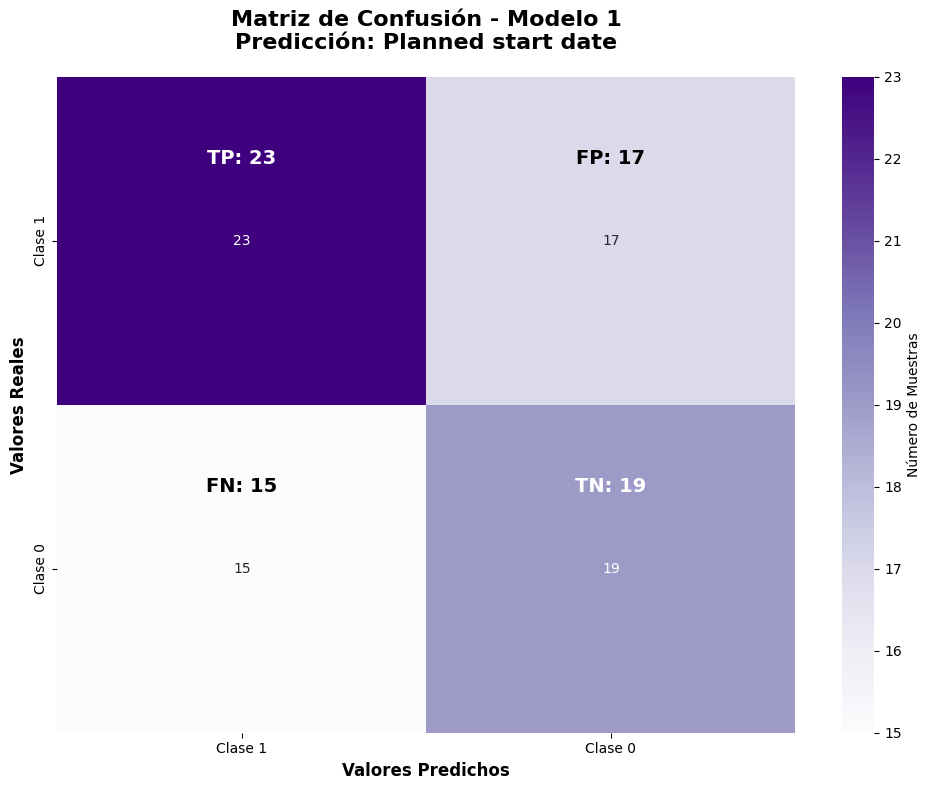

In [2350]:
# MODELO 1: TaxonName_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_1, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 1\nPredicción: Planned start date', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

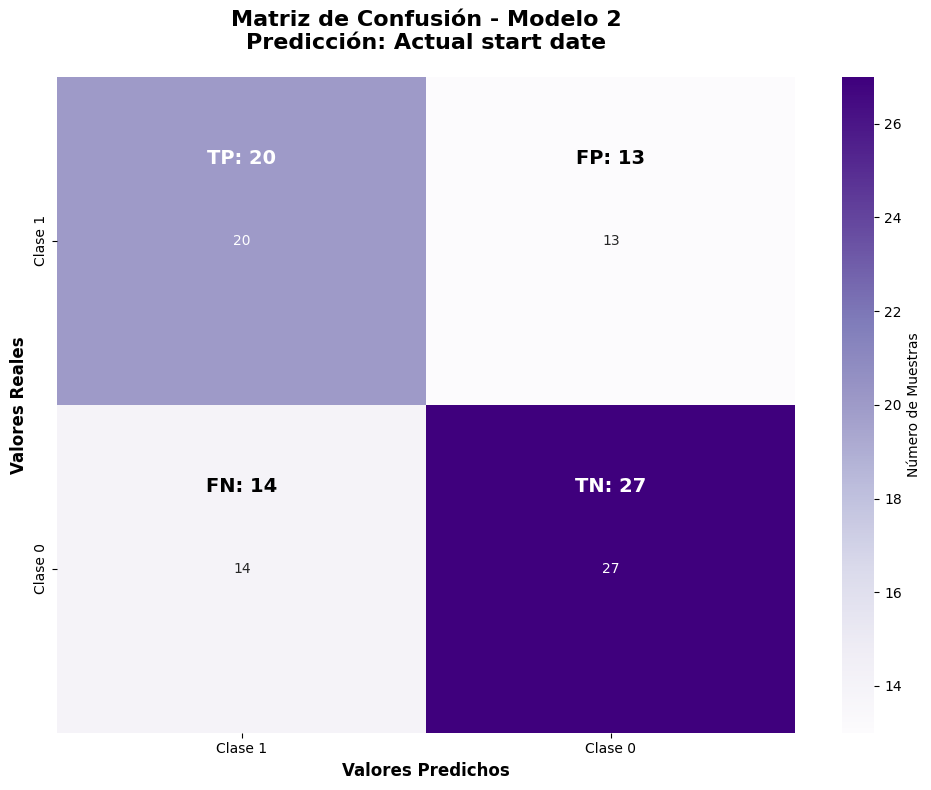

In [2351]:
# MODELO 2: TaxonCode_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_2, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 2\nPredicción: Actual start date', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

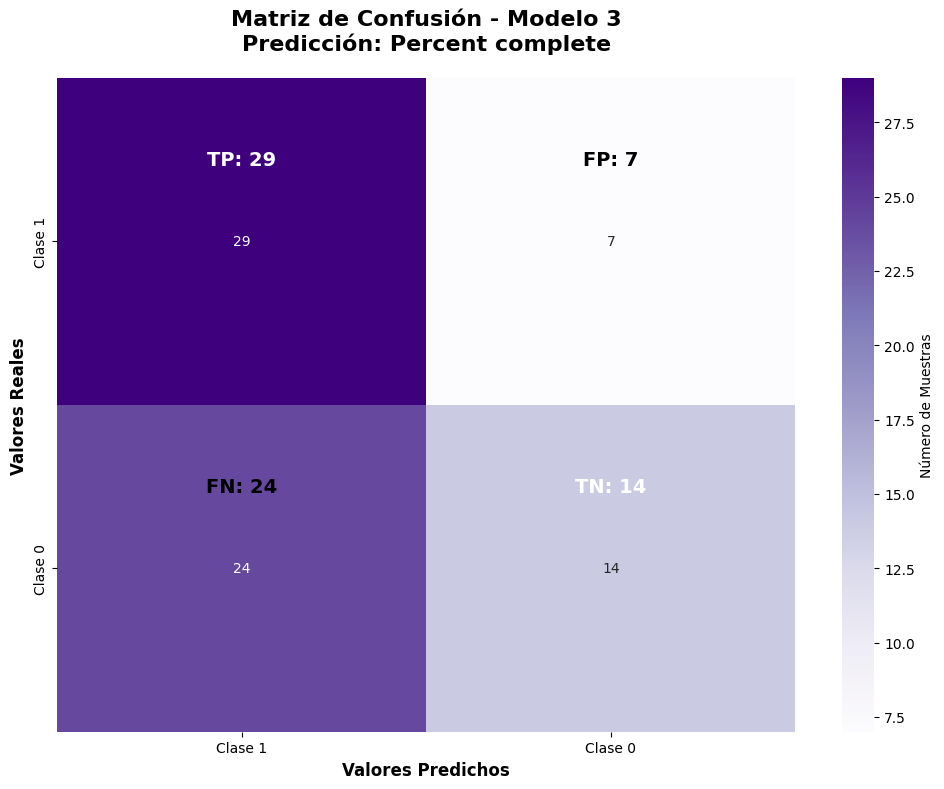

In [2353]:
# MODELO 3: SamplingOperations_code_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_3, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 3\nPredicción: Percent complete', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

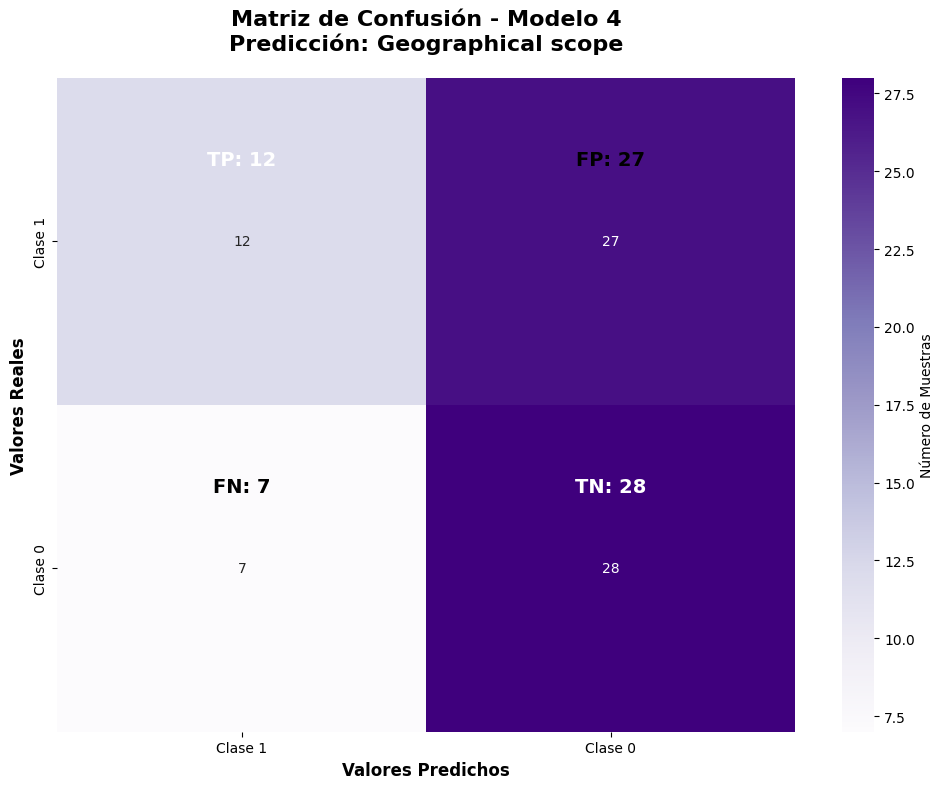

In [2354]:
# MODELO 4: CodeSite_SamplingOperations_num
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_4, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_4:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_4:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 4\nPredicción: Geographical scope', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()

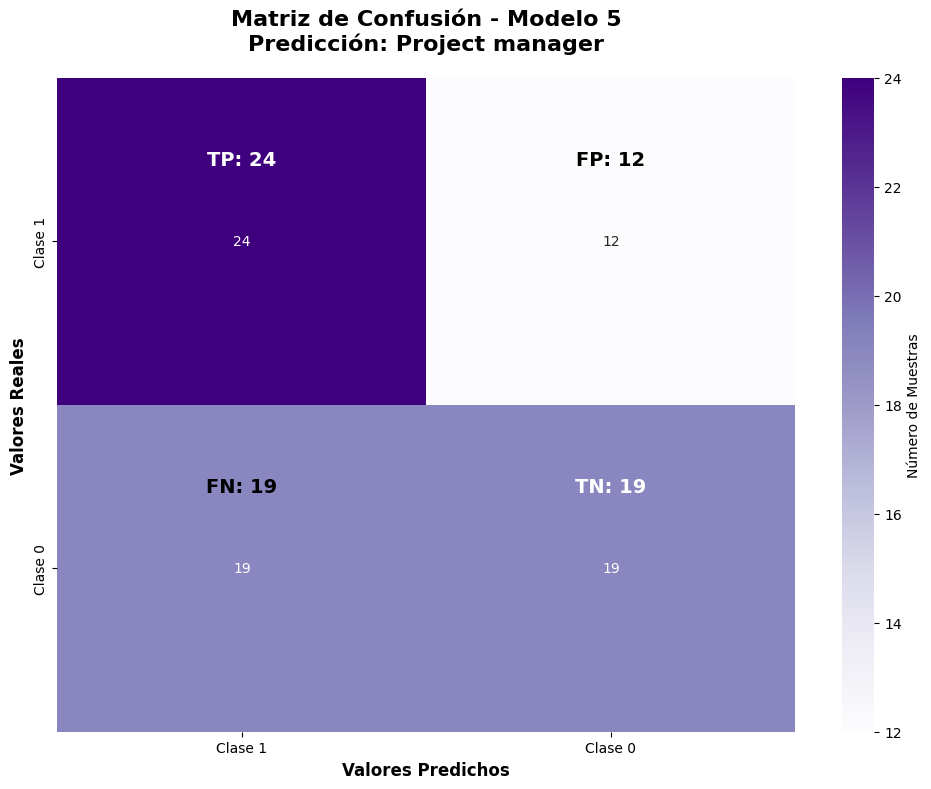

In [2355]:
# MODELO 5: Date_SamplingOperation
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_5, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TP: {True_Positives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TN: {True_Negatives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 5\nPredicción: Project manager', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.yticks([0.5, 1.5], ['Clase 1', 'Clase 0'])
plt.tight_layout()
plt.show()